#4.1 선형 회귀

##4.1.1 정규방정식

In [53]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [54]:
X.shape

(100, 1)

In [55]:
y.shape

(100, 1)

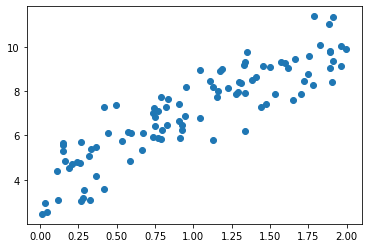

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [57]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [58]:
X_b[:5]

array([[1.        , 0.41957067],
       [1.        , 1.59546509],
       [1.        , 1.96162904],
       [1.        , 0.91336123],
       [1.        , 0.95242942]])

In [59]:
theta_best

array([[3.93495008],
       [3.16455865]])

In [60]:
theta_best.shape

(2, 1)

theta_0 = 4.22 , theta_1 = 2.85 대신 theta_0 = 4와 theta_1 = 3을 기대했었다. 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했다.

thetahat을 사용해 예측을 해보자

In [61]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]  #모든 샘플에 x0 = 1 을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93495008],
       [10.26406739]])

In [62]:
X_new.shape

(2, 1)

In [63]:
X_new

array([[0],
       [2]])

In [64]:
X_new_b

array([[1., 0.],
       [1., 2.]])

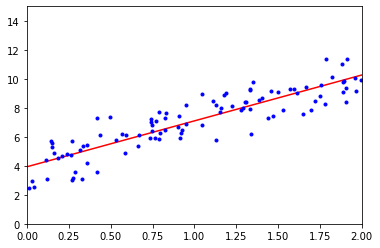

In [65]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

사이킷런에서 선형 회귀를 수행해보자

In [66]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [67]:
lin_reg.intercept_ , lin_reg.coef_

(array([3.93495008]), array([[3.16455865]]))

In [68]:
lin_reg.predict(X_new)

array([[ 3.93495008],
       [10.26406739]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수('최소 제곱') 를 기반으로 합니다.

In [69]:
theta_best_svd, residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.93495008],
       [3.16455865]])

lstsq() 함수는 thetahat = X^(+)y 을 계산한다.  
X^(+) 는 X의 유사역행렬 -> np.linalg.pinv() 함수 사용해 구할 수 있다.

In [70]:
np.linalg.pinv(X_b).dot(y)

array([[3.93495008],
       [3.16455865]])

유사역행렬 자체는 특잇값 분해(SVD) 라 불리는 표준 행렬 분해 기법을 사용해 계산된다. 정규방정식보다 유사역행렬 방식이 더 효율적이고 극단적인 경우도 처리할 수 있다. 실제로 m < n 이거나 어떤 특성이 중복되어 X^T*X 의 역행렬이 없다면 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다.

#4.2 경사 하강법

theta를 임의의 값으로 시작해서(무작위 초기화) 비용함수를 최소화하는 모델 파라미터의 조합을 찾는다.



*   학습률(learning rate)  
    학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.  
    학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 된다.




선형 회귀를 위한 MSE 비용 함수는 볼록 함수이자 연속함수여서 지역 최솟값이 없고 전역 최솟값만 있다. 따라서 경사 하강법을 통해 전역 최솟값에 가깝게 접근할 수 있는 점이 보장된다.

**주의!!!!**  
경사하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다.(예를 들어 사이킷런의 StandardScaler를 사용하여) 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.

##4.2.1 배치 경사 하강법

**비용 함수의 그레이디언트 벡터  **  
(2/m)*X^T(X*theta-y)


배치 경사 하강법에서는 이 공식을 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련 세트에서는 아주 느리지만 경사 하강법은 특성 수에 민감하지 않아 특성이 많을 경우 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

In [71]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [72]:
theta

array([[3.93495008],
       [3.16455865]])

정규방정식으로 찾은 것과 정확히 같다.

적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 **반복 횟룰 제한**해야 한다.  
반복 횟루를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 e(허용오차)보다 작아지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지한다.

##4.2.2 확률적 경사 하강법

매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다.  
**장점**  
1) 알고리즘이 빠르다.  
2) 매우 큰 훈련 세트도 훈련시킬 수 있다.  

하지만 확률적(즉, 무작위 이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다.

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다.  
**해결책**  
학습률을 점진적으로 감소시키는 것.  
시작할 때는 학습률을 크게 하고(수렴을 빠르게 하고 지역 최솟값에 빠지지 않도록), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다.  
*학습 스케줄 -> 매 반복에서 학습률을 결정하는 함수*

In [73]:
n_epochs = 50
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터  

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)   #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [74]:
theta

array([[3.9313923 ],
       [3.24300519]])

In [75]:
y.shape

(100, 1)

In [76]:
y.ravel().shape

(100,)

In [77]:
X.shape

(100, 1)

사이킷런에 SGD 방식으로 선형 회귀 사용하려면 SGDRegressor 클래스를 사용한다.

In [78]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [79]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.93058558]), array([3.15962187]))

정규 방정식으로 구한 것과 매우 비슷하다.

##4.2.3 미니배치 경사 하강법

**미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산한다. 특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다.

#4.3 다항 회귀

각 특정의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킨다. 비선형 데이터를 학습하는 데 선형 모델을 사용한다.

PolynomialFeatures 클래스  
[x1,x2] 를 2차 다항값으로 [1,x1,x2,x1^2,x1*x2,x2^2] 으로 변환

In [80]:
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5 * X**2 + 2 + np.random.randn(m,1)

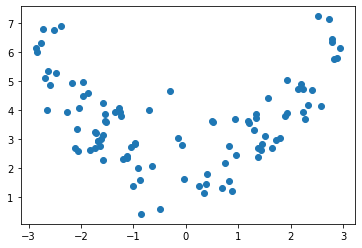

In [81]:
plt.scatter(X,y)

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.73499747])

In [83]:
X_poly[0]

array([-1.73499747,  3.01021623])

In [84]:
X_poly[:5]

array([[-1.73499747,  3.01021623],
       [ 1.8941937 ,  3.58796976],
       [-0.15509328,  0.02405393],
       [ 2.79258394,  7.79852504],
       [ 1.56166899,  2.43881002]])

In [85]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07981149]), array([[0.02578142, 0.4979915 ]]))

실제 원래 함수가 y = 0.5*x1^2 + 1.0*x1 + 2.0 + 가우시안 잡음  
예측된 모델은 yhat = 0.56*x1*2 + 0.93*x1 + 1.78  

#4.5 규제가 있는 선형 모델

과대적합을 감소시는 방법은 모델을 규제하는 것.  
선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다.

##4.5.1 릿지 회귀

###릿지 회귀의 비용 함수
J(theta) = MSE(theta) + alpha*(1/2)*sigma(theta_i)^2  
thetahat = (X^T*X + alpha*A)^(-1)*X^T*y  
A 는 맨 왼쪽 위의 원소가 0인 (n+1)x(n+1)의 단위행렬(identity matrix)  
**맨 왼쪽 위의 원소가 0인 이유  **  
theta_0는 규제에 포함되지 않기 떄문

In [86]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[3.6945927]])

확률적 경사 하강법을 사용했을 때

In [88]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.6632221])

penalty 매개변수는 사용할 규제를 지정한다. "ㅣ2" 는 SGD가 비용 함수에 가중치 벡터의 ㅣ2 노름의 제곱을 2로 나눈 규제항을 추가하게 만는다.

##4.5.2 라쏘 회귀

###라쏘 회귀의 비용 함수  
J(theta) = MSE(theta) + alpha*sigma(abs(theta))    
 **특징 **  
덜 중요한 특성의 가중치를 제거한다.  

In [89]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.64219301])

Lasso 대신 SGDRegressor(penalty='l1')을 사용할 수도 있다.

##4.5.3 엘라스틱넷

릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다. r = 0 이면 엘라스틱넷은 릿지 회귀와 같고, r = 1이면 라쏘 회귀와 같다.  
엘라스틱넷 비용함수  
J(theta) = MSE(theta) + r*alpha*sigma(abs(theta)) + ((1-r)/2)*alpha*sigma(theta^2)

릿지가 기본이 되지만  
쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.  
(불필요한 특성의 가중치를 0으로 만들어주기 때문)  
특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.  

In [91]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([3.66771392])

##4.5.4 조기 종료

In [ ]:
from sklearn.base import c_

#데이터 준비
polar_scaler = Pipeline([
                         ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
                         ("std_scaler",StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


##4.6 로지스틱 회귀 

**로지스틱 함수**  
sigma(t) = 1/(1+exp(-t))  


*   yhat = 0 (phat < 0.5 일때)
*   yhat = 1 (phat >= 0.5 일 때)  

t를 종종 로짓(logit)이라고 부른다. 추정확률 p의 로짓을 계산하면 t값을 구할 수 있다.  
logit(p) = log(p/(1-p))



###4.6.3 결정 경계  

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기를 만들어보자

In [92]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [94]:
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [95]:
X = iris["data"][:,3:]   #꽃잎의 너비
y = (iris["target"]==2).astype(np.int)   #1 Iris-Virginica면 1, 그렇지 않으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [97]:
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [98]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산해보자

In [101]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
X_new.shape

(1000, 1)

In [104]:
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [105]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

Text(0, 0.5, 'probability')

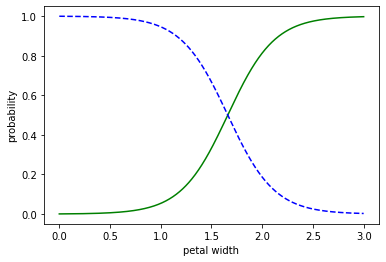

In [109]:
plt.plot(X_new,y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new,y_proba[:,0],"b--",label = "Not Iris virginica")
plt.xlabel("petal width")
plt.ylabel("probability")

꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신한다.  
반면 1cm 아래면 Iris-Verginica가 아니라고 강하게 확신한다.  
**결정 경계**  
양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 만들어진다.  
꽃잎 너비가 1.6cm 보다 크면 분류기는 Irise-Verginica로 분류하고,  
그보다 작으면 아니라고 예측할 것이다.  

In [110]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

다른 선형 모델처럼 로지스틱 회귀 모델도 l_1,l_2 페널티를 사용하여 규제할 수 있다. 사이킷런은 ㅣ_2 페널티를 기본으로 한다.  
**주의!!!**  
사이킷런의 LogisticRegression 모델의 규제 강도를 조절하는 하이퍼파라미터는 alpha가 아니고 그 역수에 해당하는 C입니다. C가 높을수록 모델의 규제가 줄어듭니다.  

###4.6.4 소프트맥스 회귀

클래스 k에 대한 소프트맥스 함수  
s_k(x) = (theta_k)^T*x  

샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s_k(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다.  

In [112]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

꽃잎의 길이가 5cm, 너비가 2cm 인 붓꽃을 발견했다고 가정하고 이 붓꽃의 품종이 무엇인지 모델에 질의하면 94.2%의 확률로 Iris-Virginica(클래스2) 라고 출력할 것이다.(또는 5.8% 확률로 Iris-Versicolor 라고)

In [113]:
softmax_reg.predict([[5,2]])

array([2])

In [114]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [115]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')